# About the dataset: House Sales Price Predictor
This data contains housing sale prices with 79 explanatory variables describing almost every aspect of residential homes in Ames, Iowa. Through this project, we will be predicting the sale price of the house based on various predictors such as the house condition, number of bedrooms, number of kitchens, and many others.

The dataset we will be using has been obtained from Kaggle:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

We have the following attributes in our dataset:

* `SalePrice`: The property's sale price (in USD). This is the target variable that we're trying to predict.
* `MSSubClass`: The building class
* `MSZoning`: The general zoning classification
* `LotFrontage`: Linear feet of street connected to property
* `LotArea`: Lot size (in square feet)
* `Street`: Type of road access
* `Alley`: Type of alley access
* `LotShape`: General shape of property
* `LandContour`: Flatness of the property
* `Utilities`: Type of utilities available
* `LotConfig`: Lot configuration
* `LandSlope`: Slope of property
* `Neighborhood`: Physical locations within Ames city limits
* `Condition1`: Proximity to main road or railroad
* `Condition2`: Proximity to main road or railroad (if a second is present)
* `BldgType`: Type of dwelling
* `HouseStyle`: Style of dwelling
* `OverallQual`: Overall material and finish quality
* `OverallCond`: Overall condition rating
* `YearBuilt`: Original construction date
* `YearRemodAdd`: Remodel date
* `RoofStyle`: Type of roof
* `RoofMatl`: Roof material
* `Exterior1st`: Exterior covering on house
* `Exterior2nd`: Exterior covering on house (if more than one material)
* `MasVnrType`: Masonry veneer type
* `MasVnrArea`: Masonry veneer area in square feet
* `ExterQual`: Exterior material quality
* `ExterCond`: Present condition of the material on the exterior
* `Foundation`: Type of foundation
* `BsmtQual`: Height of the basement
* `BsmtCond`: General condition of the basement
* `BsmtExposure`: Walkout or garden level basement walls
* `BsmtFinType1`: Quality of basement finished area
* `BsmtFinSF1`: Type 1 finished square feet
* `BsmtFinType2`: Quality of second finished area (if present)
* `BsmtFinSF2`: Type 2 finished square feet
* `BsmtUnfSF`: Unfinished square feet of basement area
* `TotalBsmtSF`: Total square feet of basement area
* `Heating`: Type of heating
* `HeatingQC`: Heating quality and condition
* `CentralAir`: Central air conditioning
* `Electrical`: Electrical system
* `1stFlrSF`: First Floor square feet
* `2ndFlrSF`: Second floor square feet
* `LowQualFinSF`: Low quality finished square feet (all floors)
* `GrLivArea`: Above grade (ground) living area square feet
* `BsmtFullBath`: Basement full bathrooms
* `BsmtHalfBath`: Basement half bathrooms
* `FullBath`: Full bathrooms above grade
* `HalfBath`: Half baths above grade
* `Bedroom`: Number of bedrooms above basement level
* `Kitchen`: Number of kitchens
* `KitchenQual`: Kitchen quality
* `TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms)
* `Functional`: Home functionality rating
* `Fireplaces`: Number of fireplaces
* `FireplaceQu`: Fireplace quality
* `GarageType`: Garage location
* `GarageYrBlt`: Year garage was built
* `GarageFinish`: Interior finish of the garage
* `GarageCars`: Size of garage in car capacity
* `GarageArea`: Size of garage in square feet
* `GarageQual`: Garage quality
* `GarageCond`: Garage condition
* `PavedDrive`: Paved driveway
* `WoodDeckSF`: Wood deck area in square feet
* `OpenPorchSF`: Open porch area in square feet
* `EnclosedPorch`: Enclosed porch area in square feet
* `3SsnPorch`: Three season porch area in square feet
* `ScreenPorch`: Screen porch area in square feet
* `PoolArea`: Pool area in square feet
* `PoolQC`: Pool quality
* `Fence`: Fence quality
* `MiscFeature`: Miscellaneous feature not covered in other categories
* `MiscVal`: $Value of miscellaneous feature
* `MoSold`: Month Sold
* `YrSold`: Year Sold
* `SaleType`: Type of sale
* `SaleCondition`: Condition of sale


# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
!pip install --upgrade openpyxl
from IPython.display import clear_output 
!pip install category_encoders
from sklearn import preprocessing
from scipy.stats import chi2_contingency
import category_encoders as ce
import warnings
from sklearn.preprocessing import OneHotEncoder

     |████████████████████████████████| 86 kB 1.3 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load the dataset

In [2]:
# Load the dataset
from google.colab import files
file = files.upload()
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

Saving test.csv to test.csv
Saving train.csv to train.csv


The existing dataset has already been data partitioned (50-50) into training and test dataset. (train.csv and test.csv)

The **`training data`** has 80 columns (79 attributes, 1 target variable) and 1460 rows. 

The **`test data`** has 79 columns (79 attributes and no target variable) and 1459 rows. This test data is unlabelled that is, we do not have the actual sale price values.

In [3]:
# Dropping the ID Column of train dataset
df_train.drop(['Id'], axis = 1, inplace = True)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Dropping the ID Column of test dataset
df_test.drop(['Id'], axis = 1, inplace = True)
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Dealing with Date columns - Calculating their Ages
We have 4 columns `YearBuilt`, `YearRemodAdd`, `YrSold` and `GarageYrBlt` denoting the year the house was built, remodeled, sold and the year the garage was built. It makes more sense to calculate the respective ages of these Year columns. Hence we manipulate the data by calculating age upto today's year.

In [5]:
# Calculating the house age, remodel age and garage age to deal with Year values
today = date.today()
df_train['HouseAge'] = today.year - df_train['YearBuilt']
df_train['HouseRemodelAge'] = today.year - df_train['YearRemodAdd']
df_train['HouseSoldAge'] = today.year - df_train['YrSold']
df_train['GarageAge'] = today.year - df_train['GarageYrBlt']

# Dropping the 3 year columns after calculating their respective ages
df_train.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,HouseAge,HouseRemodelAge,HouseSoldAge,GarageAge
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,2,WD,Normal,208500,19,19,14,19.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,0,5,WD,Normal,181500,46,46,15,46.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,0,9,WD,Normal,223500,21,20,14,21.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,0,2,WD,Abnorml,140000,107,52,16,24.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,0,12,WD,Normal,250000,22,22,14,22.0


# Dealing with missing values - Working with numerical columns and categorical columns separately

We can see in the below heatmap that we have a lot of missing values in our dataset. We try to explore this missing data for numerical and categorical columns individually.

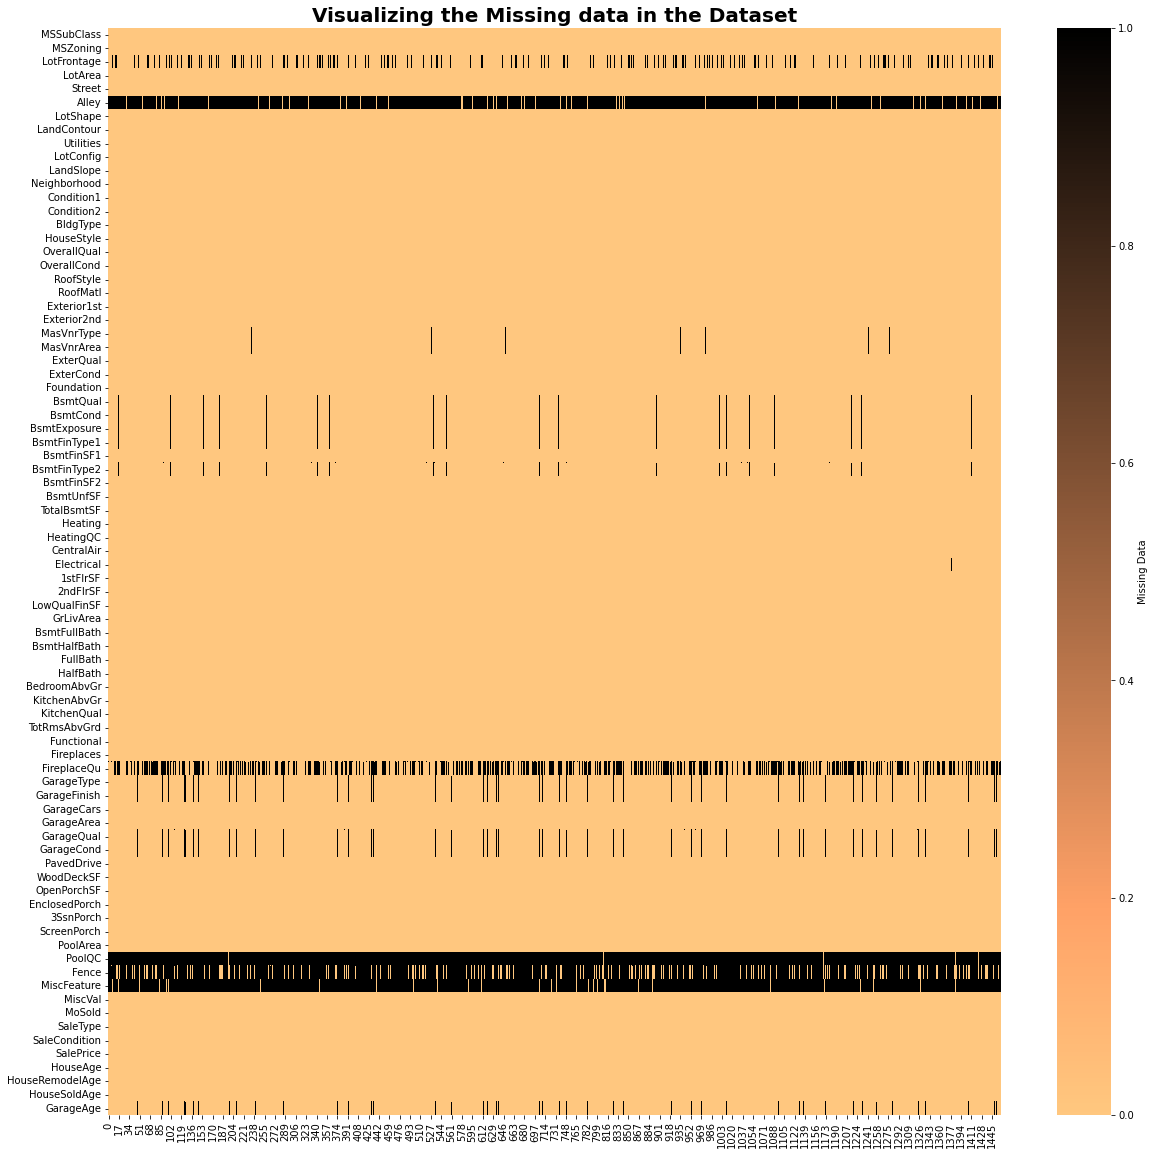

In [6]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.isna().transpose(),
            cmap = "copper_r",
            cbar_kws = {'label' : 'Missing Data'})
plt.title("Visualizing the Missing data in the Dataset",
          fontsize = 20, fontweight = "bold")
plt.show()


We have 3 numerical columns with missing values. We will be using the threshold as 17% for the missing values i.e., all the columns having missing values more than this threshold will be dropped. Thus, we are dropping 1 column (`LotFrontage`). Another column containing missing values is `MasVnrArea` where these missing values signify that such houses don't have masonry veneer. Thus, it makes sense to impute NaN with 0. As for the 3rd column `GarageAge`, missing value means that there is no garage present in the house. Hence, we impute these values with 0.

In [7]:
# Creating a dataframe with numerical columns
df_train_num = df_train._get_numeric_data()

# Calculating the missing percent of each column
df_missing_percent = pd.DataFrame(round(df_train_num.isnull().sum() * 100 / len(df_train_num), 2))
df_missing_percent.rename(columns = {0 : 'missing_percent'}, inplace = True)

# Setting the threshold as 17% and dropping the columns above this threshold
columns_to_drop = df_missing_percent[df_missing_percent.missing_percent > 17]
df_train_num.drop(columns_to_drop.index, axis = 1, inplace = True)

# Imputing the missing value for remaining 2 columns with 0
df_train_num = df_train_num.fillna(0)

# Checking if any missing values are remaining
pd.DataFrame(round(df_train_num.isnull().sum() * 100 / len(df_train_num), 2))


,0
MSSubClass,0.0
LotArea,0.0
OverallQual,0.0
OverallCond,0.0
MasVnrArea,0.0
BsmtFinSF1,0.0
BsmtFinSF2,0.0
BsmtUnfSF,0.0
TotalBsmtSF,0.0
1stFlrSF,0.0



As for the categorical columns, they have NAs which do not actually represent missing values. For example, in the column `Alley`, the actual data contains NA which is abbreviated for No Alley Access, hence we cannot consider such values as missing values. Hence, in order to deal with such values, we replace all NA values with 'None'.

In [8]:
# Creating a dataframe with categorical columns
cat_columns = df_train.select_dtypes(include = ['object']).columns.tolist()
df_train_cat = df_train[df_train.columns[df_train.columns.isin(cat_columns)]]
df_train_cat = df_train_cat.fillna("None")

# Checking if any missing values are remaining
pd.DataFrame(round(df_train_cat.isnull().sum() * 100 / len(df_train_cat),2))

,0
MSZoning,0.0
Street,0.0
Alley,0.0
LotShape,0.0
LandContour,0.0
Utilities,0.0
LotConfig,0.0
LandSlope,0.0
Neighborhood,0.0
Condition1,0.0


# Dimensionality Reduction
# 1. Correlation Matrix for Numeric Variables (Pearson's Coefficient)
As a part of dimension reduction, we will calculate the correlation between every 2 numerical columns. If a pair of variables are highly correlated (with their respective correlation value greater than 0.8), then we are dropping 1 of them.

In [9]:
# Drop the target variable while calculating the correlation matrix
df_temp = df_train_num.drop(['SalePrice'], axis = 1, inplace = False)

df_corr_matrix = round(df_temp.corr(), 2)
df_corr_matrix

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,HouseRemodelAge,HouseSoldAge,GarageAge
MSSubClass,1.00,-0.14,0.03,-0.06,0.02,-0.07,-0.07,-0.14,-0.24,-0.25,...,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.03,-0.04,0.02,-0.11
LotArea,-0.14,1.00,0.11,-0.01,0.10,0.21,0.11,-0.00,0.26,0.30,...,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,-0.01,0.01,0.05
OverallQual,0.03,0.11,1.00,-0.09,0.41,0.24,-0.06,0.31,0.54,0.48,...,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.57,-0.55,0.03,-0.38
OverallCond,-0.06,-0.01,-0.09,1.00,-0.13,-0.05,0.04,-0.14,-0.17,-0.14,...,0.07,0.03,0.05,-0.00,0.07,-0.00,0.38,-0.07,-0.04,0.29
MasVnrArea,0.02,0.10,0.41,-0.13,1.00,0.26,-0.07,0.11,0.36,0.34,...,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.31,-0.18,0.01,-0.18
BsmtFinSF1,-0.07,0.21,0.24,-0.05,0.26,1.00,-0.05,-0.50,0.52,0.45,...,-0.10,0.03,0.06,0.14,0.00,-0.02,-0.25,-0.13,-0.01,-0.10
BsmtFinSF2,-0.07,0.11,-0.06,0.04,-0.07,-0.05,1.00,-0.21,0.10,0.10,...,0.04,-0.03,0.09,0.04,0.00,-0.02,0.05,0.07,-0.03,0.10
BsmtUnfSF,-0.14,-0.00,0.31,-0.14,0.11,-0.50,-0.21,1.00,0.42,0.32,...,-0.00,0.02,-0.01,-0.04,-0.02,0.03,-0.15,-0.18,0.04,-0.16
TotalBsmtSF,-0.24,0.26,0.54,-0.17,0.36,0.52,0.10,0.42,1.00,0.82,...,-0.10,0.04,0.08,0.13,-0.02,0.01,-0.39,-0.29,0.01,-0.23
1stFlrSF,-0.25,0.30,0.48,-0.14,0.34,0.45,0.10,0.32,0.82,1.00,...,-0.07,0.06,0.09,0.13,-0.02,0.03,-0.28,-0.24,0.01,-0.15


Creating a correlation matrix heatmap to better visualize the correlation values

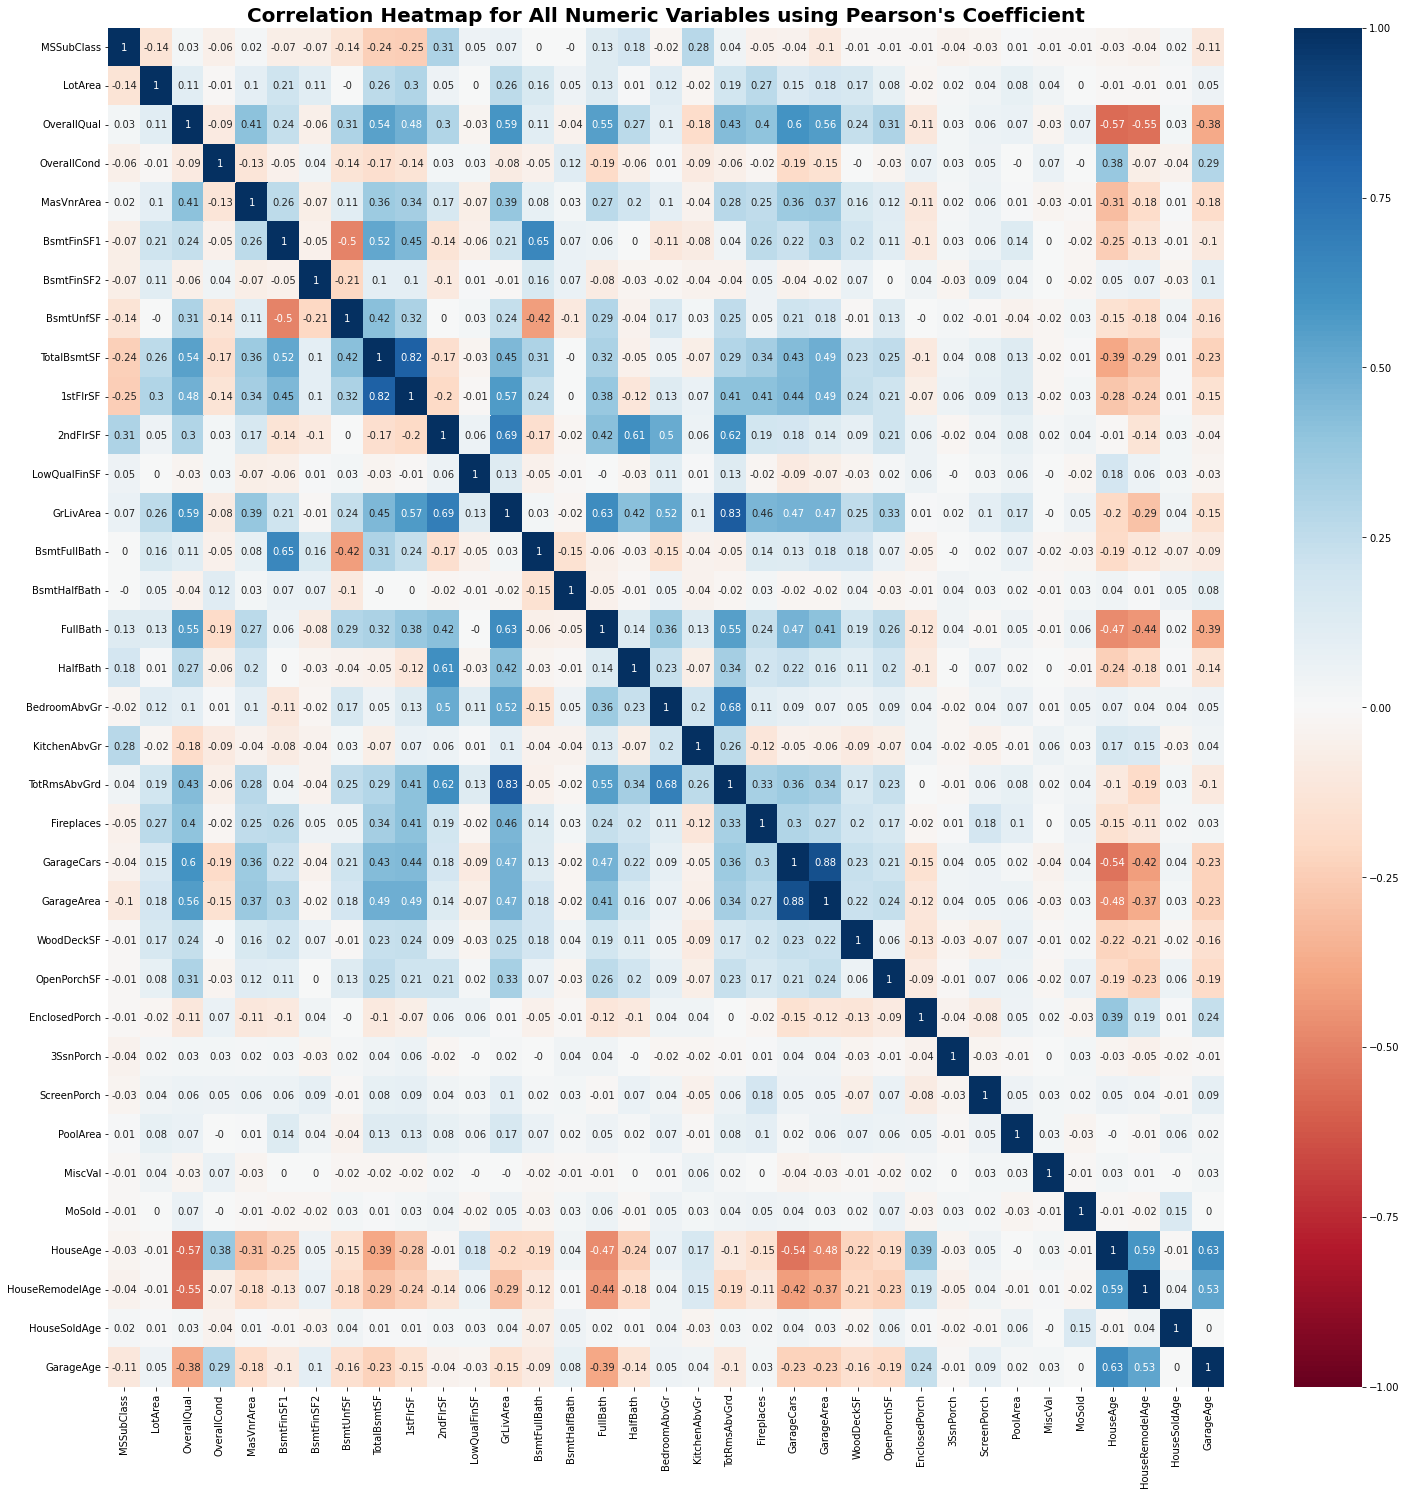

In [10]:
# Plotting a correlation matrix heatmap

plt.figure(figsize = (25, 25))
sns.heatmap(df_corr_matrix, annot = True, square = False,
            vmin = -1, vmax = 1, cmap = "RdBu")
plt.title("Correlation Heatmap for All Numeric Variables using Pearson's Coefficient",
          fontsize = 20,
          weight = "bold")
plt.show()

In [11]:
# Getting a dataframe of highly correlated numerical variables (with corr value > 0.8)
df_corr_stacked = pd.DataFrame(df_temp.corr().unstack().sort_values().drop_duplicates())
df_corr_stacked.rename(columns = {0 : 'corr_value'}, inplace = True)
df_corr_stacked = df_corr_stacked[(df_corr_stacked.corr_value > 0.8) & (df_corr_stacked.corr_value != 1)]
df_corr_stacked.reset_index(inplace = True)
df_corr_stacked

,level_0,level_1,corr_value
0,TotalBsmtSF,1stFlrSF,0.819530
1,TotRmsAbvGrd,GrLivArea,0.825489
2,GarageCars,GarageArea,0.882475


Based on this correlation matrix, 3 pairs of variables are highly correlated. Hence, we are dropping the columns: `TotalBsmtSF`, `TotRmsAbvGrd` and `GarageCars`.

In [12]:
df_train_num_dr = df_train_num.drop(["TotalBsmtSF", "TotRmsAbvGrd", "GarageCars"],
                                    axis = 1, inplace = False)
df_train_num_dr.head() # Processed numerical data

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,HouseRemodelAge,HouseSoldAge,GarageAge
0,60,8450,7,5,196.0,706,0,150,856,854,...,0,0,0,0,2,208500,19,19,14,19.0
1,20,9600,6,8,0.0,978,0,284,1262,0,...,0,0,0,0,5,181500,46,46,15,46.0
2,60,11250,7,5,162.0,486,0,434,920,866,...,0,0,0,0,9,223500,21,20,14,21.0
3,70,9550,7,5,0.0,216,0,540,961,756,...,0,0,0,0,2,140000,107,52,16,24.0
4,60,14260,8,5,350.0,655,0,490,1145,1053,...,0,0,0,0,12,250000,22,22,14,22.0


# 2. Correlation Matrix for Categorical Variables (Crammer's Rule)
Definition of Crammer's Rule - We are defining a function for calculating the correlation matrix between categorical columns of a dataset. This user-defined function has been obtained from Kaggle: https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix

In [13]:
def cramers_V(var1, var2) :
  crosstab = np.array(pd.crosstab(var1, var2, rownames = None, colnames = None)) # Cross table building
  stat = chi2_contingency(crosstab, correction = False)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape) - 1 # Take the minimum value between the columns and the rows of the cross table
  return (stat / (obs * mini))

Encoding categorical columns to convert to a form that can be used for Crammer's Rule

In [14]:
cat_encoded = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

for i in df_train_cat.columns :
  data_encoded[i] = cat_encoded.fit_transform(df_train_cat[i])

data_encoded.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,...,1,2,5,5,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,...,5,3,5,5,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,...,1,2,5,5,2,3,4,1,8,4


Building a confusion matrix to include all the categorical columns

In [15]:
mat_rows = []

# Using for loop and calling the crammer function to create the matrix
for i in data_encoded:
  mat_cols = []
  for j in data_encoded:
    cram = cramers_V(data_encoded[i], data_encoded[j])
    mat_cols.append(round(cram, 2))
  mat_rows.append(mat_cols)

cram_res = np.array(mat_rows)
df_confusion_mat = pd.DataFrame(cram_res, columns = data_encoded.columns,
                                index = data_encoded.columns)
df_confusion_mat # Correlation matrix of categorical columns

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
MSZoning,1.00,0.06,0.15,0.03,0.01,0.00,0.01,0.01,0.43,0.01,...,0.05,0.04,0.02,0.01,0.05,0.00,0.00,0.00,0.03,0.02
Street,0.06,1.00,0.00,0.00,0.02,0.00,0.00,0.03,0.06,0.03,...,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.02,0.01
Alley,0.15,0.00,1.00,0.01,0.01,0.00,0.00,0.00,0.20,0.02,...,0.04,0.02,0.02,0.02,0.03,0.00,0.00,0.00,0.01,0.01
LotShape,0.03,0.00,0.01,1.00,0.02,0.00,0.05,0.02,0.08,0.02,...,0.02,0.02,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00
LandContour,0.01,0.02,0.01,0.02,1.00,0.00,0.01,0.21,0.15,0.00,...,0.02,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.01
Utilities,0.00,0.00,0.00,0.00,0.00,1.00,0.01,0.00,0.03,0.00,...,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01
LotConfig,0.01,0.00,0.00,0.05,0.01,0.01,1.00,0.01,0.04,0.03,...,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
LandSlope,0.01,0.03,0.00,0.02,0.21,0.00,0.01,1.00,0.12,0.00,...,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Neighborhood,0.43,0.06,0.20,0.08,0.15,0.03,0.04,0.12,1.00,0.05,...,0.11,0.19,0.06,0.05,0.11,0.02,0.05,0.01,0.05,0.06
Condition1,0.01,0.03,0.02,0.02,0.00,0.00,0.03,0.00,0.05,1.00,...,0.01,0.02,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.00


In [16]:
# Getting a dataframe of highly correlated categorical variables (with corr value > 0.6)
df_confusion_mat_stacked = pd.DataFrame(df_confusion_mat.corr().unstack().sort_values().drop_duplicates())
df_confusion_mat_stacked.rename(columns = {0 : 'corr_value'}, inplace = True)

df_confusion_mat_stacked = df_confusion_mat_stacked[(df_confusion_mat_stacked.corr_value > 0.6) & (df_confusion_mat_stacked.corr_value != 1)]
df_confusion_mat_stacked

df_confusion_mat_stacked.index.names = ["index_1", "index_2"]
df_confusion_mat_stacked.reset_index(inplace = True)
df_confusion_mat_stacked

,index_1,index_2,corr_value
0,BsmtQual,BsmtFinType1,0.607478
1,GarageFinish,GarageQual,0.610604
2,GarageCond,GarageFinish,0.613192
3,MSZoning,Neighborhood,0.644037
4,GarageType,GarageFinish,0.743423
5,GarageCond,GarageQual,0.799799
6,Exterior2nd,Exterior1st,0.851769


Identifying the categorical columns that can to be dropped:

We identify the pairs of categorical variables that are highly correlated. Now, in order to choose which variable can be dropped, we check the number of categories for the pair of correlated columns. The category having more number of categorical values is chosen to be dropped so that while encoding the categorical columns into numerical, lesser number of newer columns are created.

In [41]:
df_train_cat_str = df_train_cat.describe().transpose() 
df_train_cat_str.reset_index(inplace = True)

df_index1_cnt = df_confusion_mat_stacked[["index_1", "index_2"]].merge(df_train_cat_str[["index", "unique"]],
                               how = "left",
                               left_on = "index_1",
                               right_on = "index")
df_index1_cnt = df_index1_cnt.rename(columns = {"unique" : "cat1"})

df_index2_cnt = df_index1_cnt[["index_1", "index_2", "index", "cat1"]].merge(df_train_cat_str[["index", "unique"]],
                               how = "left",
                               left_on = "index_2",
                               right_on = "index")

df_index2_cnt= df_index2_cnt.rename(columns = {"unique" : "cat2"})

df_index2_cnt["to_drop"] = np.where(df_index2_cnt["cat1"] > df_index2_cnt["cat2"],
                                    df_index2_cnt["index_1"],
                                    df_index2_cnt["index_2"])

cat_cols_to_drop = df_index2_cnt["to_drop"].unique()

df_train_cat = df_train_cat.drop(cat_cols_to_drop, axis = 1)

df_train_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageFinish,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,Gd,Typ,None,RFn,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,...,TA,Typ,TA,RFn,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,Gd,Typ,TA,RFn,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,Gd,Typ,Gd,Unf,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,...,Gd,Typ,TA,RFn,Y,None,None,None,WD,Normal


## Data Exploration and Visualization
## 1. Combining Categories

We can see from the bar plot that a lot of categorical columns have a few rare categories that can be combined together under a single category. This is done so that during encoding these categorical columns into numerical values, lesser number of new columns are created.

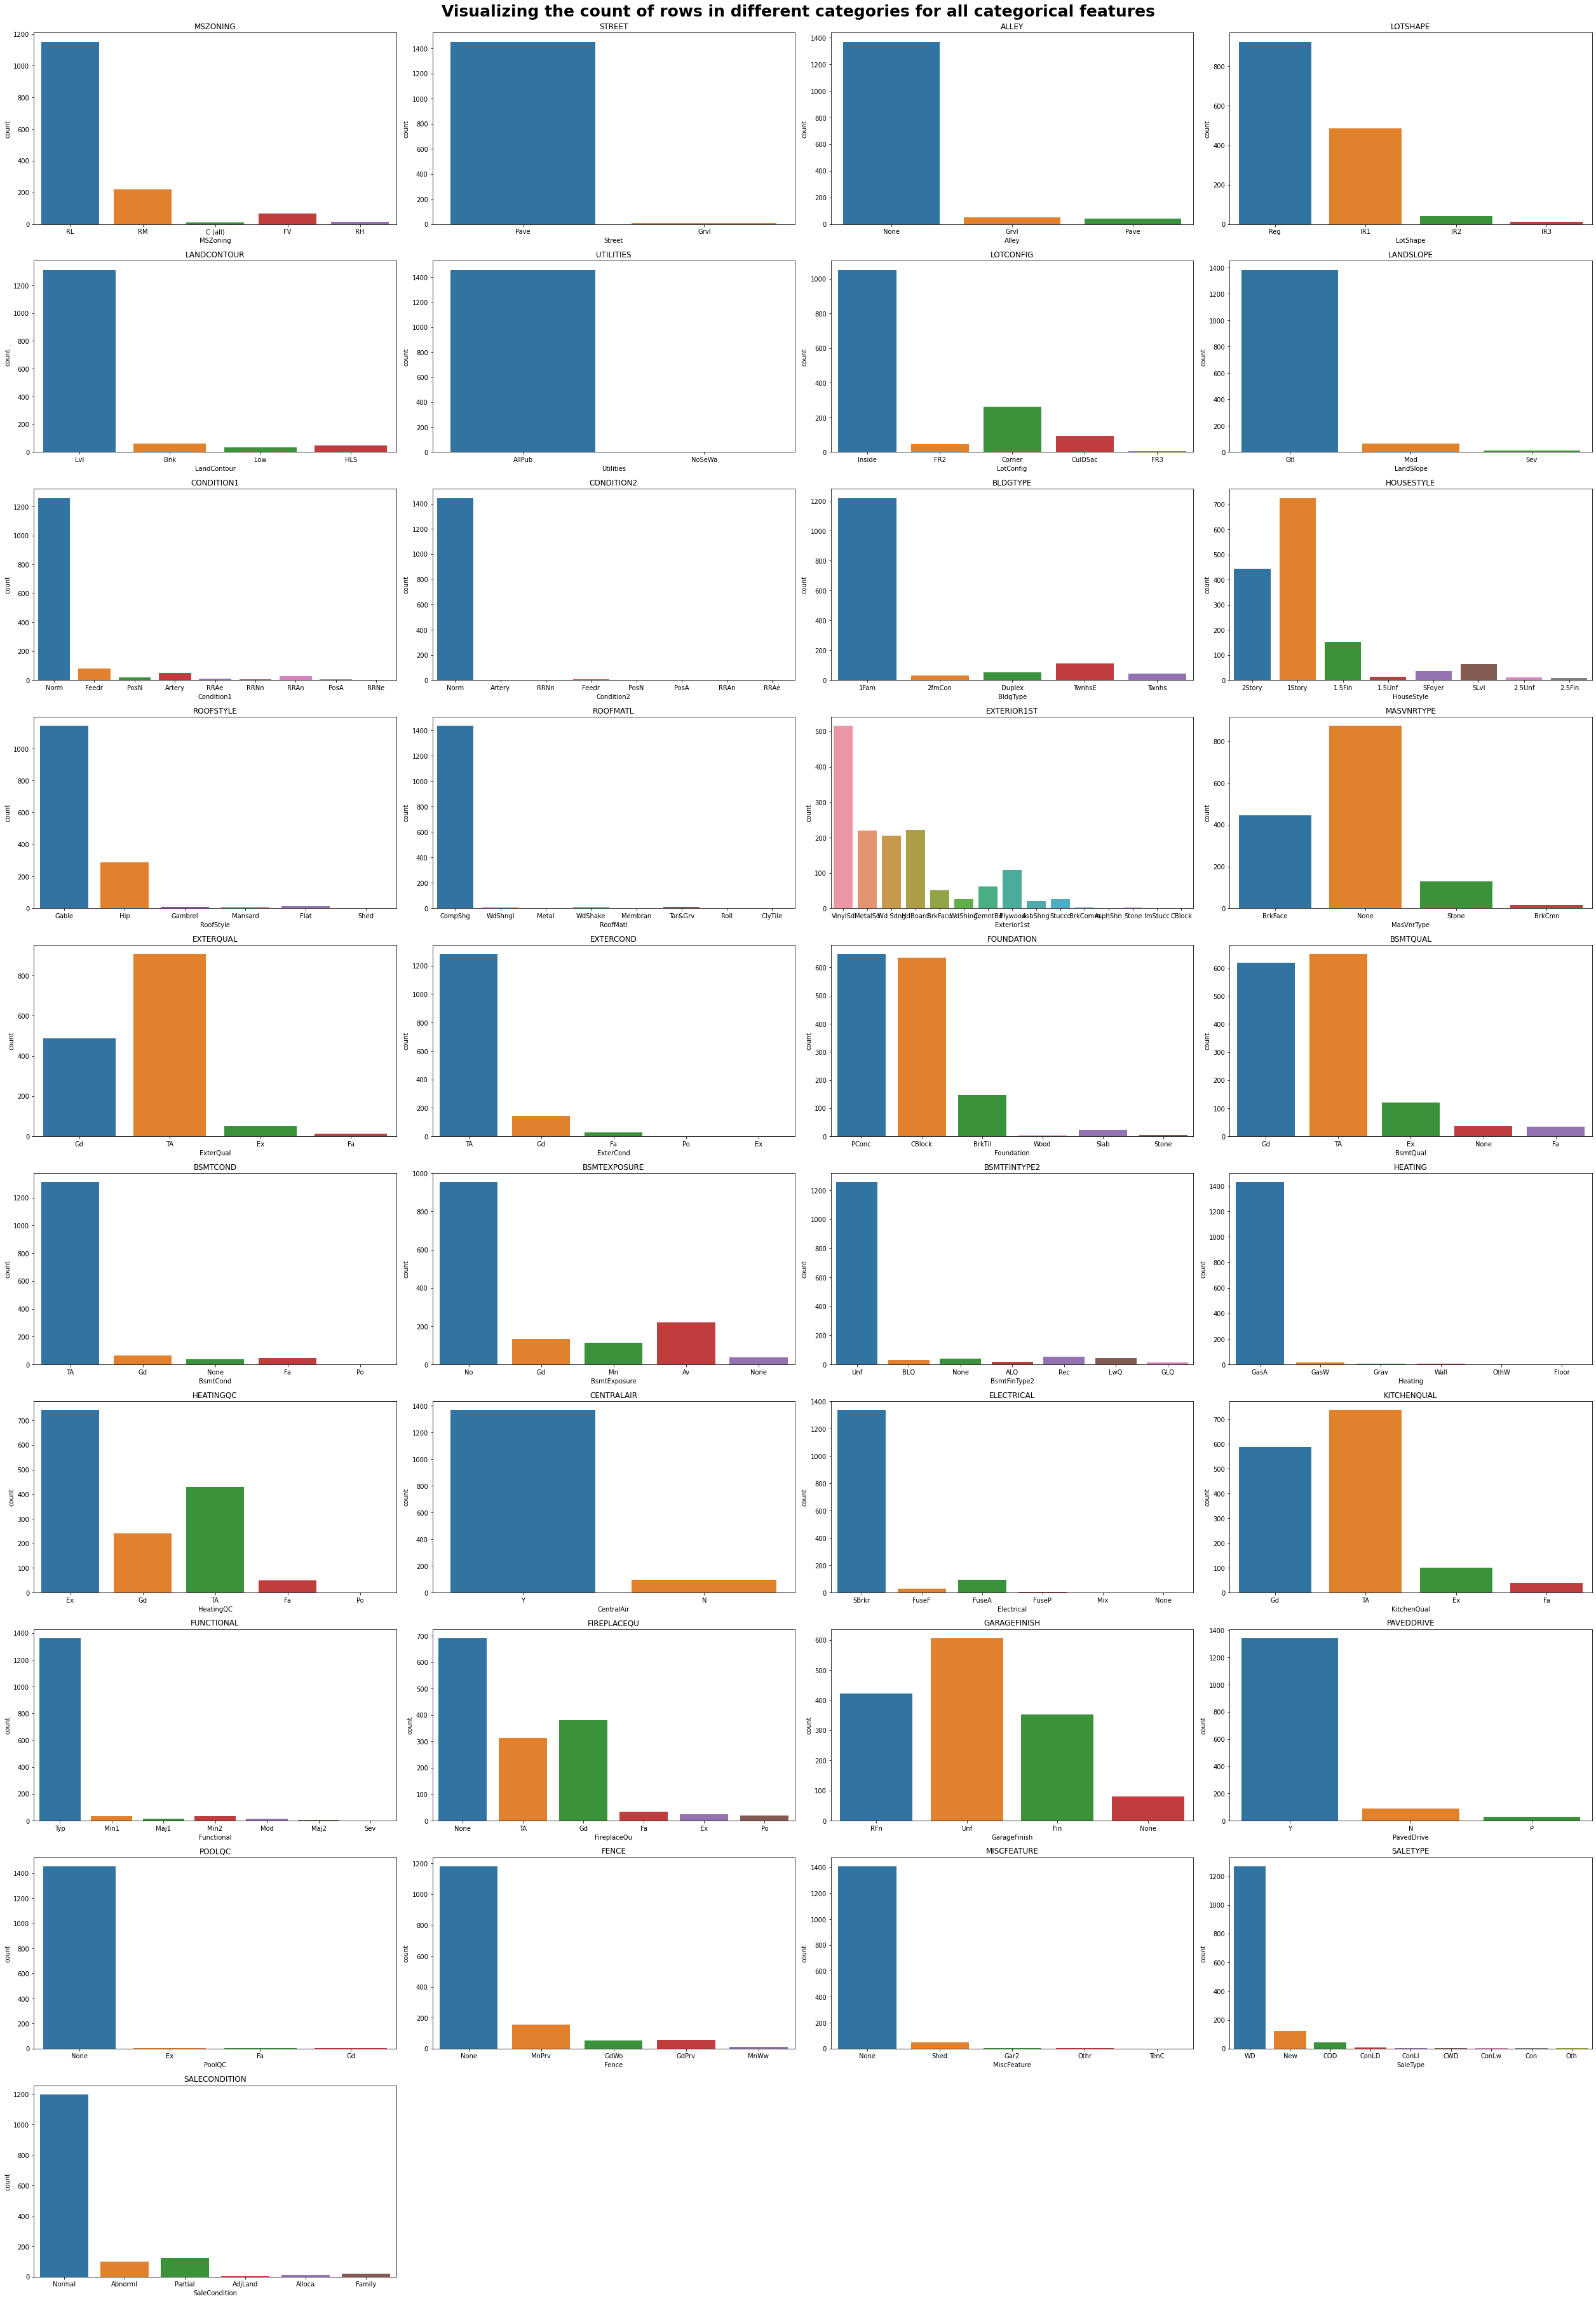

In [18]:
warnings.filterwarnings("ignore")
plt.figure(figsize = (35, 50))
plt.suptitle("Visualizing the count of rows in different categories for all categorical features",
             fontsize = 25, y = 1.005, fontweight = "bold")

for n, ticker in enumerate(df_train_cat.columns):
    ax = plt.subplot(10, 4, n + 1)
    ax = sns.countplot(df_train_cat[ticker])
    ax.set_title(ticker.upper(), fontsize = 12)
    plt.tight_layout()

We have fixed a threshold of 20% of the most dominant category, that is, if any category has records 20% less than the most dominant category, then we combine such categories under "Other" category. This is done for all the 37 categorical columns.

In [19]:
# Creating a copy of the categorical columns dataframe
df_train_cat_new = df_train_cat

# For loop to iterate through all the categorical columns in dataset
for i, column in enumerate(df_train_cat.columns):
  grouped_df = pd.DataFrame(df_train_cat[column].value_counts())
  # Creating an empty list to store the categories crossing the threshold of 0.2
  to_combine = []
  # Iterating through all the categories in current categorical column
  for index, row in grouped_df.itertuples():
    max_value = max(grouped_df.values)
    if(row < 0.2 * max_value):
      to_combine.append(index) # append to the empty list if threshold condition satisfies
  
  # Replacing the category with 'Other' for the list of categories obtained above
  df_train_cat_new = df_train_cat_new.assign(new_column = np.where(df_train_cat_new[column].isin(to_combine),
                                                                   'Other', df_train_cat_new[column]))
  df_train_cat_new[column] = df_train_cat_new['new_column']

df_train_cat_new.drop(['new_column'], axis = 1, inplace = True)

df_train_cat_new.head() # Viewing the final data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageFinish,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,Gd,Typ,None,RFn,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,Other,Gtl,Other,Norm,...,TA,Typ,TA,RFn,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,Gd,Typ,TA,RFn,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,Gd,Typ,Gd,Unf,Y,None,None,None,WD,Other
4,RL,Pave,None,IR1,Lvl,AllPub,Other,Gtl,Norm,Norm,...,Gd,Typ,TA,RFn,Y,None,None,None,WD,Normal


Using this method, we have reduced 104 categories (cumulative sum of all categorical columns combined).

In [20]:
sum_old = 0
for i, column in enumerate(df_train_cat.columns):
  sum_old = sum_old + len(df_train_cat[column].value_counts())

sum_new = 0
for i, column in enumerate(df_train_cat_new.columns):
  sum_new = sum_new + len(df_train_cat_new[column].value_counts())

print("Number of Categories Reduced = " + str(sum_old - sum_new))

Number of Categories Reduced = 104


In [ ]:
for i, column in enumerate(df_train_cat_new.columns):
  grouped_df = pd.DataFrame(df_train_cat_new[column].value_counts())
  print(grouped_df)

One-Hot Encoding of the Categorical Columns

In [43]:
cat_encoded = preprocessing.LabelEncoder()
df_train_cat_encoded = pd.DataFrame()

for i in df_train_cat_new.columns :
  df_train_cat_encoded[i] = cat_encoded.fit_transform(df_train_cat_new[i])

df_train_cat_encoded.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageFinish,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,1,0,2,0,0,1,0,0,0,...,0,1,1,2,1,0,0,0,1,0
1,1,1,0,2,0,0,2,0,1,0,...,2,1,3,2,1,0,0,0,1,0
2,1,1,0,0,0,0,1,0,0,0,...,0,1,3,2,1,0,0,0,1,0
3,1,1,0,0,0,0,0,0,0,0,...,0,1,0,3,1,0,0,0,1,1
4,1,1,0,0,0,0,2,0,0,0,...,0,1,3,2,1,0,0,0,1,0


In [31]:
# df_train_cat_new

# from sklearn.preprocessing import OneHotEncoder
# y = OneHotEncoder().fit_transform(df_train_cat_new)


# # use pd.concat to join the new columns with your original dataframe
# df = pd.concat([df_train_cat_new, pd.get_dummies(df_train_cat_new['country'], prefix='country')],axis=1)

# # now drop the original 'country' column (you don't need it anymore)
# df.drop(['country'],axis=1, inplace=True)
# print(y)

# 2. Assessing the correlation between all numerical variables and Target - "Sales Price"

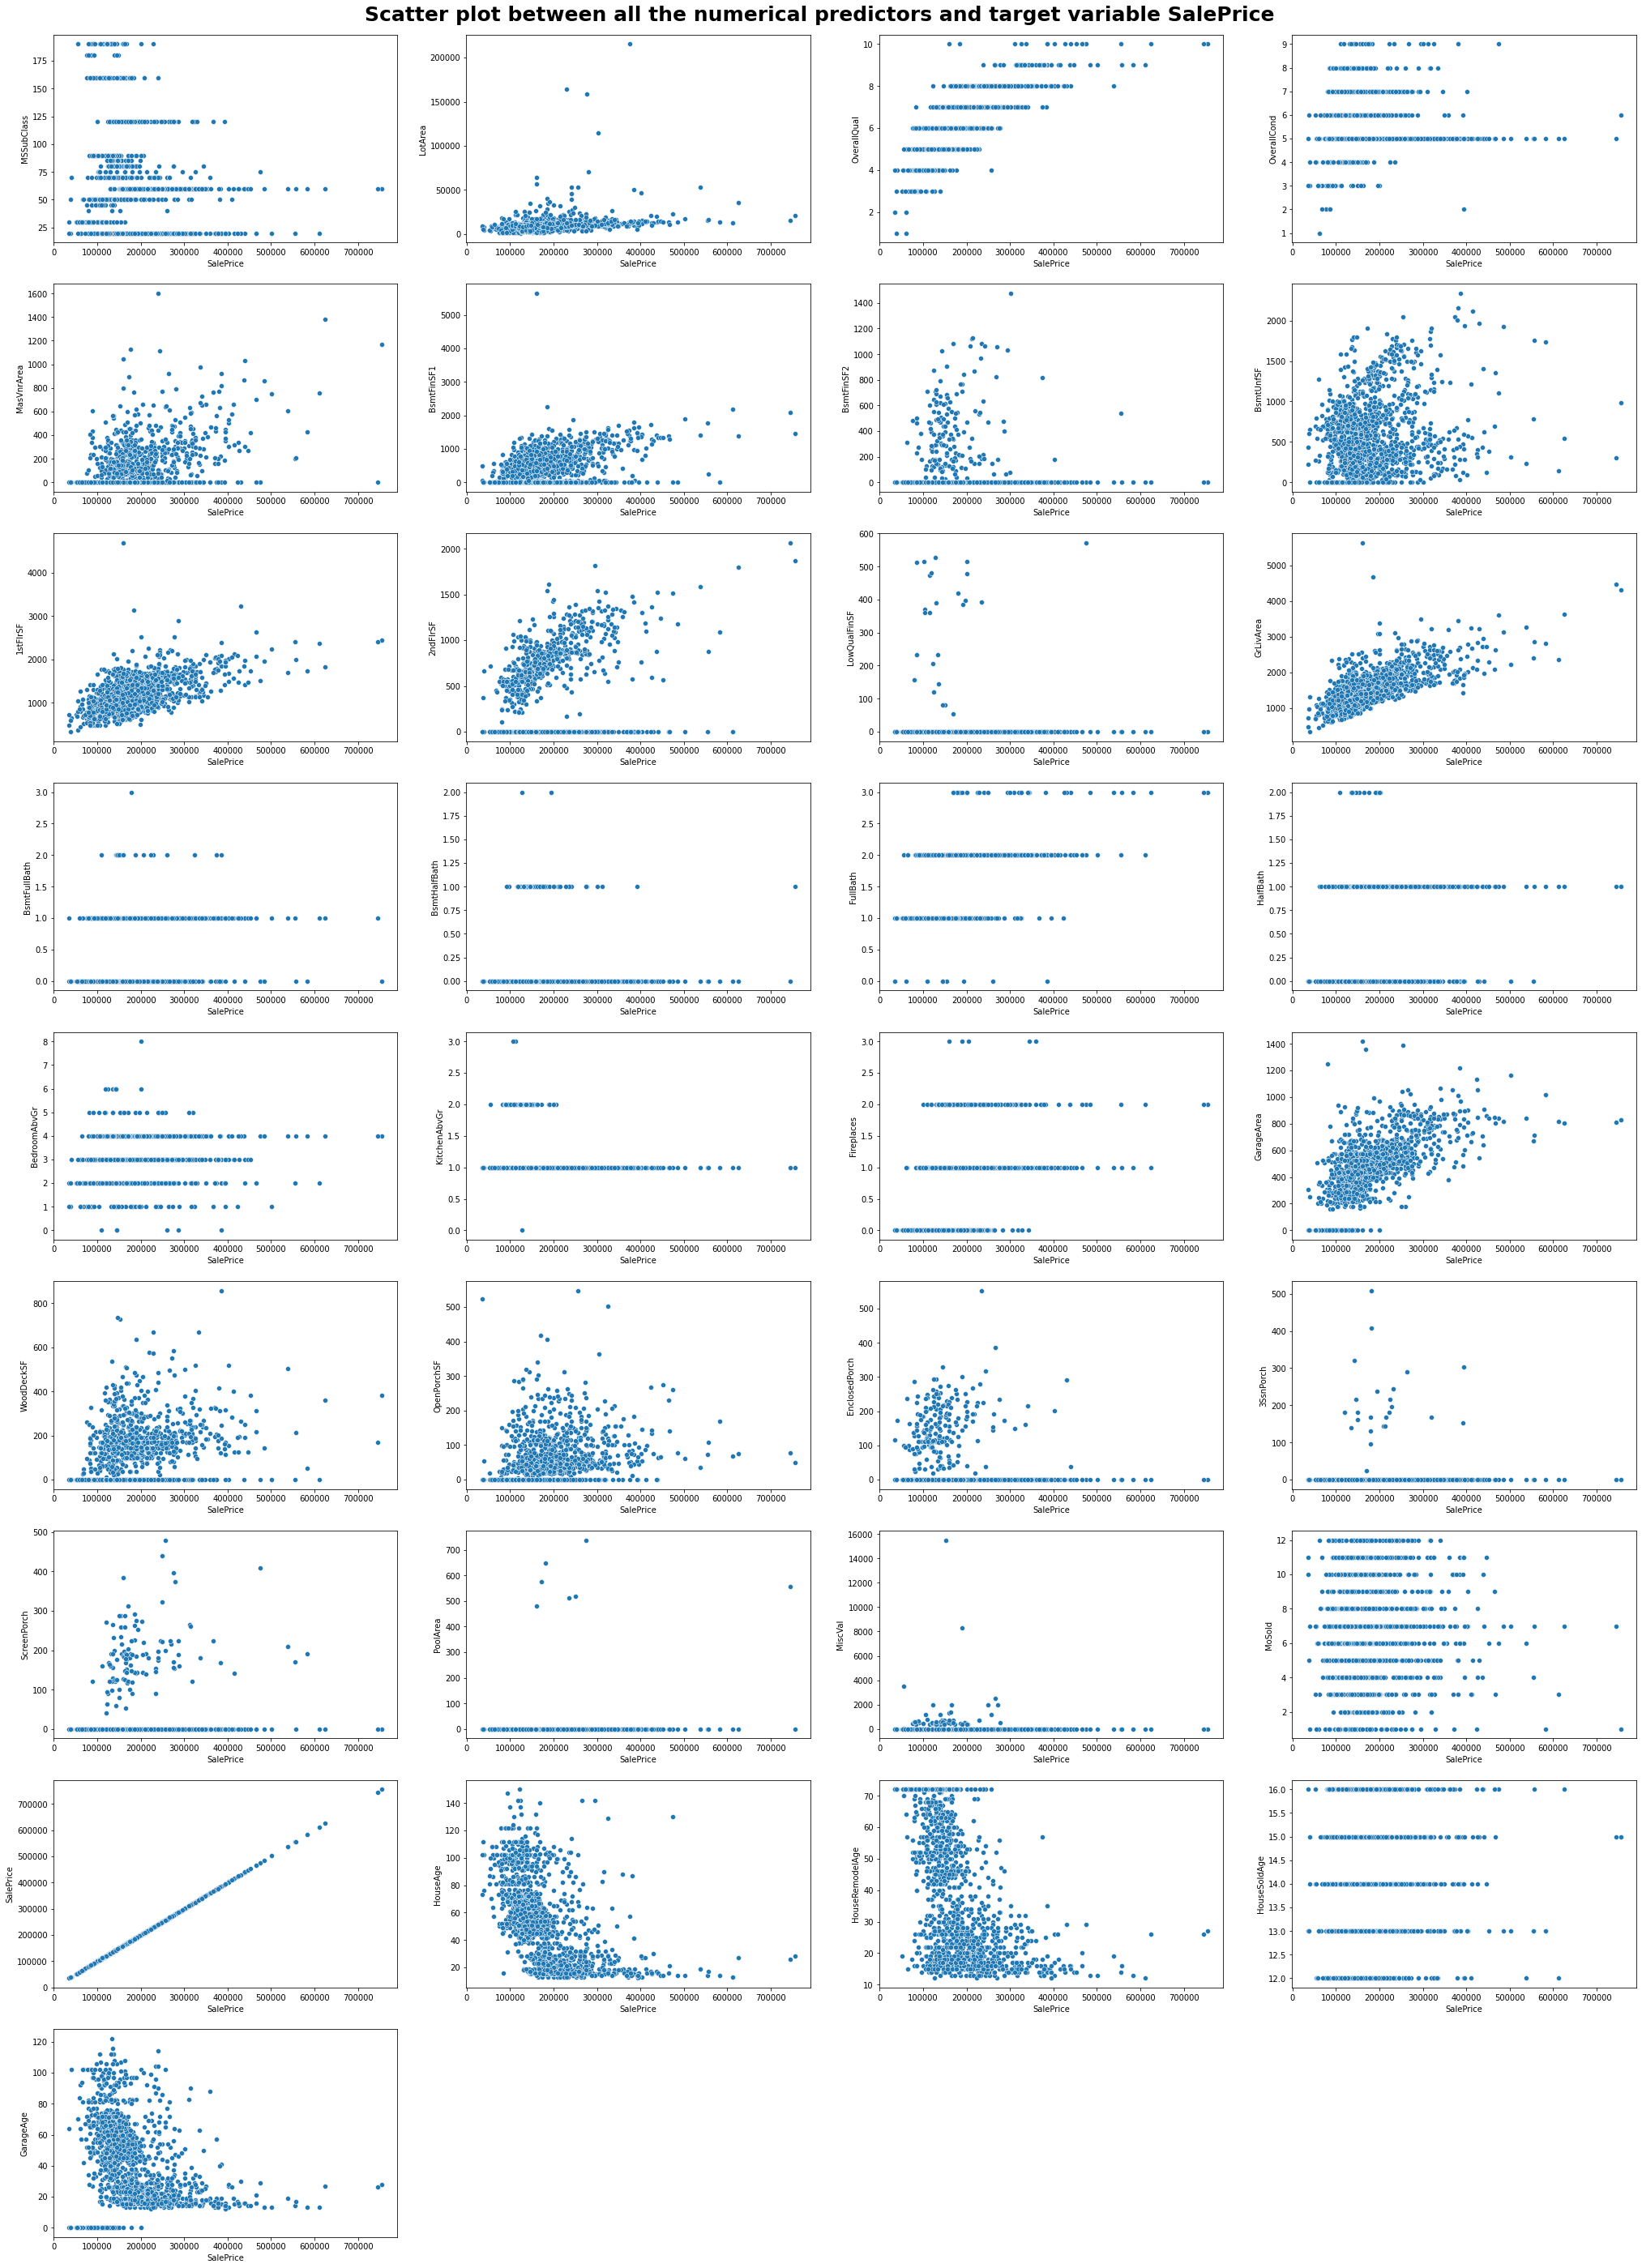

In [28]:
df_scatter_num = df_train_num_dr

warnings.filterwarnings("ignore")
plt.subplots(figsize = (35, 50))
plt.suptitle("Scatter plot between all the numerical predictors and target variable SalePrice",
             fontsize = 25, y = 0.89, fontweight = "bold")

count = 1
for i in df_scatter_num.columns:
     plt.subplot(9, 4, count)
     sns.scatterplot(df_scatter_num["SalePrice"], df_scatter_num[i])
     count = count + 1
plt.tight_layout
plt.show()

We are dropping the numerical predictors that are weakly correlated with the target variable.

In [29]:
# Creating an empty list to store the correlation values between each predictor and target
corr_with_saleprice_col = []

for j in df_scatter_num.columns:
  list_temp = []
  corr = df_scatter_num[j].corr(df_scatter_num["SalePrice"])
  list_temp.append(j)
  list_temp.append(corr)
  corr_with_saleprice_col.append(list_temp)

df_corr_with_saleprice = pd.DataFrame(data = corr_with_saleprice_col,
                                      columns = ["Predictor","Correlation_Coefficient"])

# Dropping the weakly correlated columns with Sales Price (target) having less than 0.5 as correlation coefficients 
df_weak_corr_with_saleprice = df_corr_with_saleprice[abs(df_corr_with_saleprice.Correlation_Coefficient ) < 0.2]
df_weak_corr_with_saleprice_col = df_weak_corr_with_saleprice["Predictor"].unique()

df_scatter_num = df_scatter_num.drop(df_weak_corr_with_saleprice_col, axis = 1)
df_scatter_num

,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,HouseAge,HouseRemodelAge,GarageAge
0,8450,7,196.0,706,150,856,854,1710,1,2,1,0,548,0,61,208500,19,19,19.0
1,9600,6,0.0,978,284,1262,0,1262,0,2,0,1,460,298,0,181500,46,46,46.0
2,11250,7,162.0,486,434,920,866,1786,1,2,1,1,608,0,42,223500,21,20,21.0
3,9550,7,0.0,216,540,961,756,1717,1,1,0,1,642,0,35,140000,107,52,24.0
4,14260,8,350.0,655,490,1145,1053,2198,1,2,1,1,836,192,84,250000,22,22,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,0.0,0,953,953,694,1647,0,2,1,1,460,0,40,175000,23,22,23.0
1456,13175,6,119.0,790,589,2073,0,2073,1,2,0,2,500,349,0,210000,44,34,44.0
1457,9042,7,0.0,275,877,1188,1152,2340,0,2,0,2,252,0,60,266500,81,16,81.0
1458,9717,5,0.0,49,0,1078,0,1078,1,1,0,0,240,366,0,142125,72,26,72.0


# 3. Assessing the correlation between Categorical Predictors and Target - SalePrice

Similarly, we are assessing the correlation coefficients between categorical and target variables and drop the predictors that are weakly correlated.

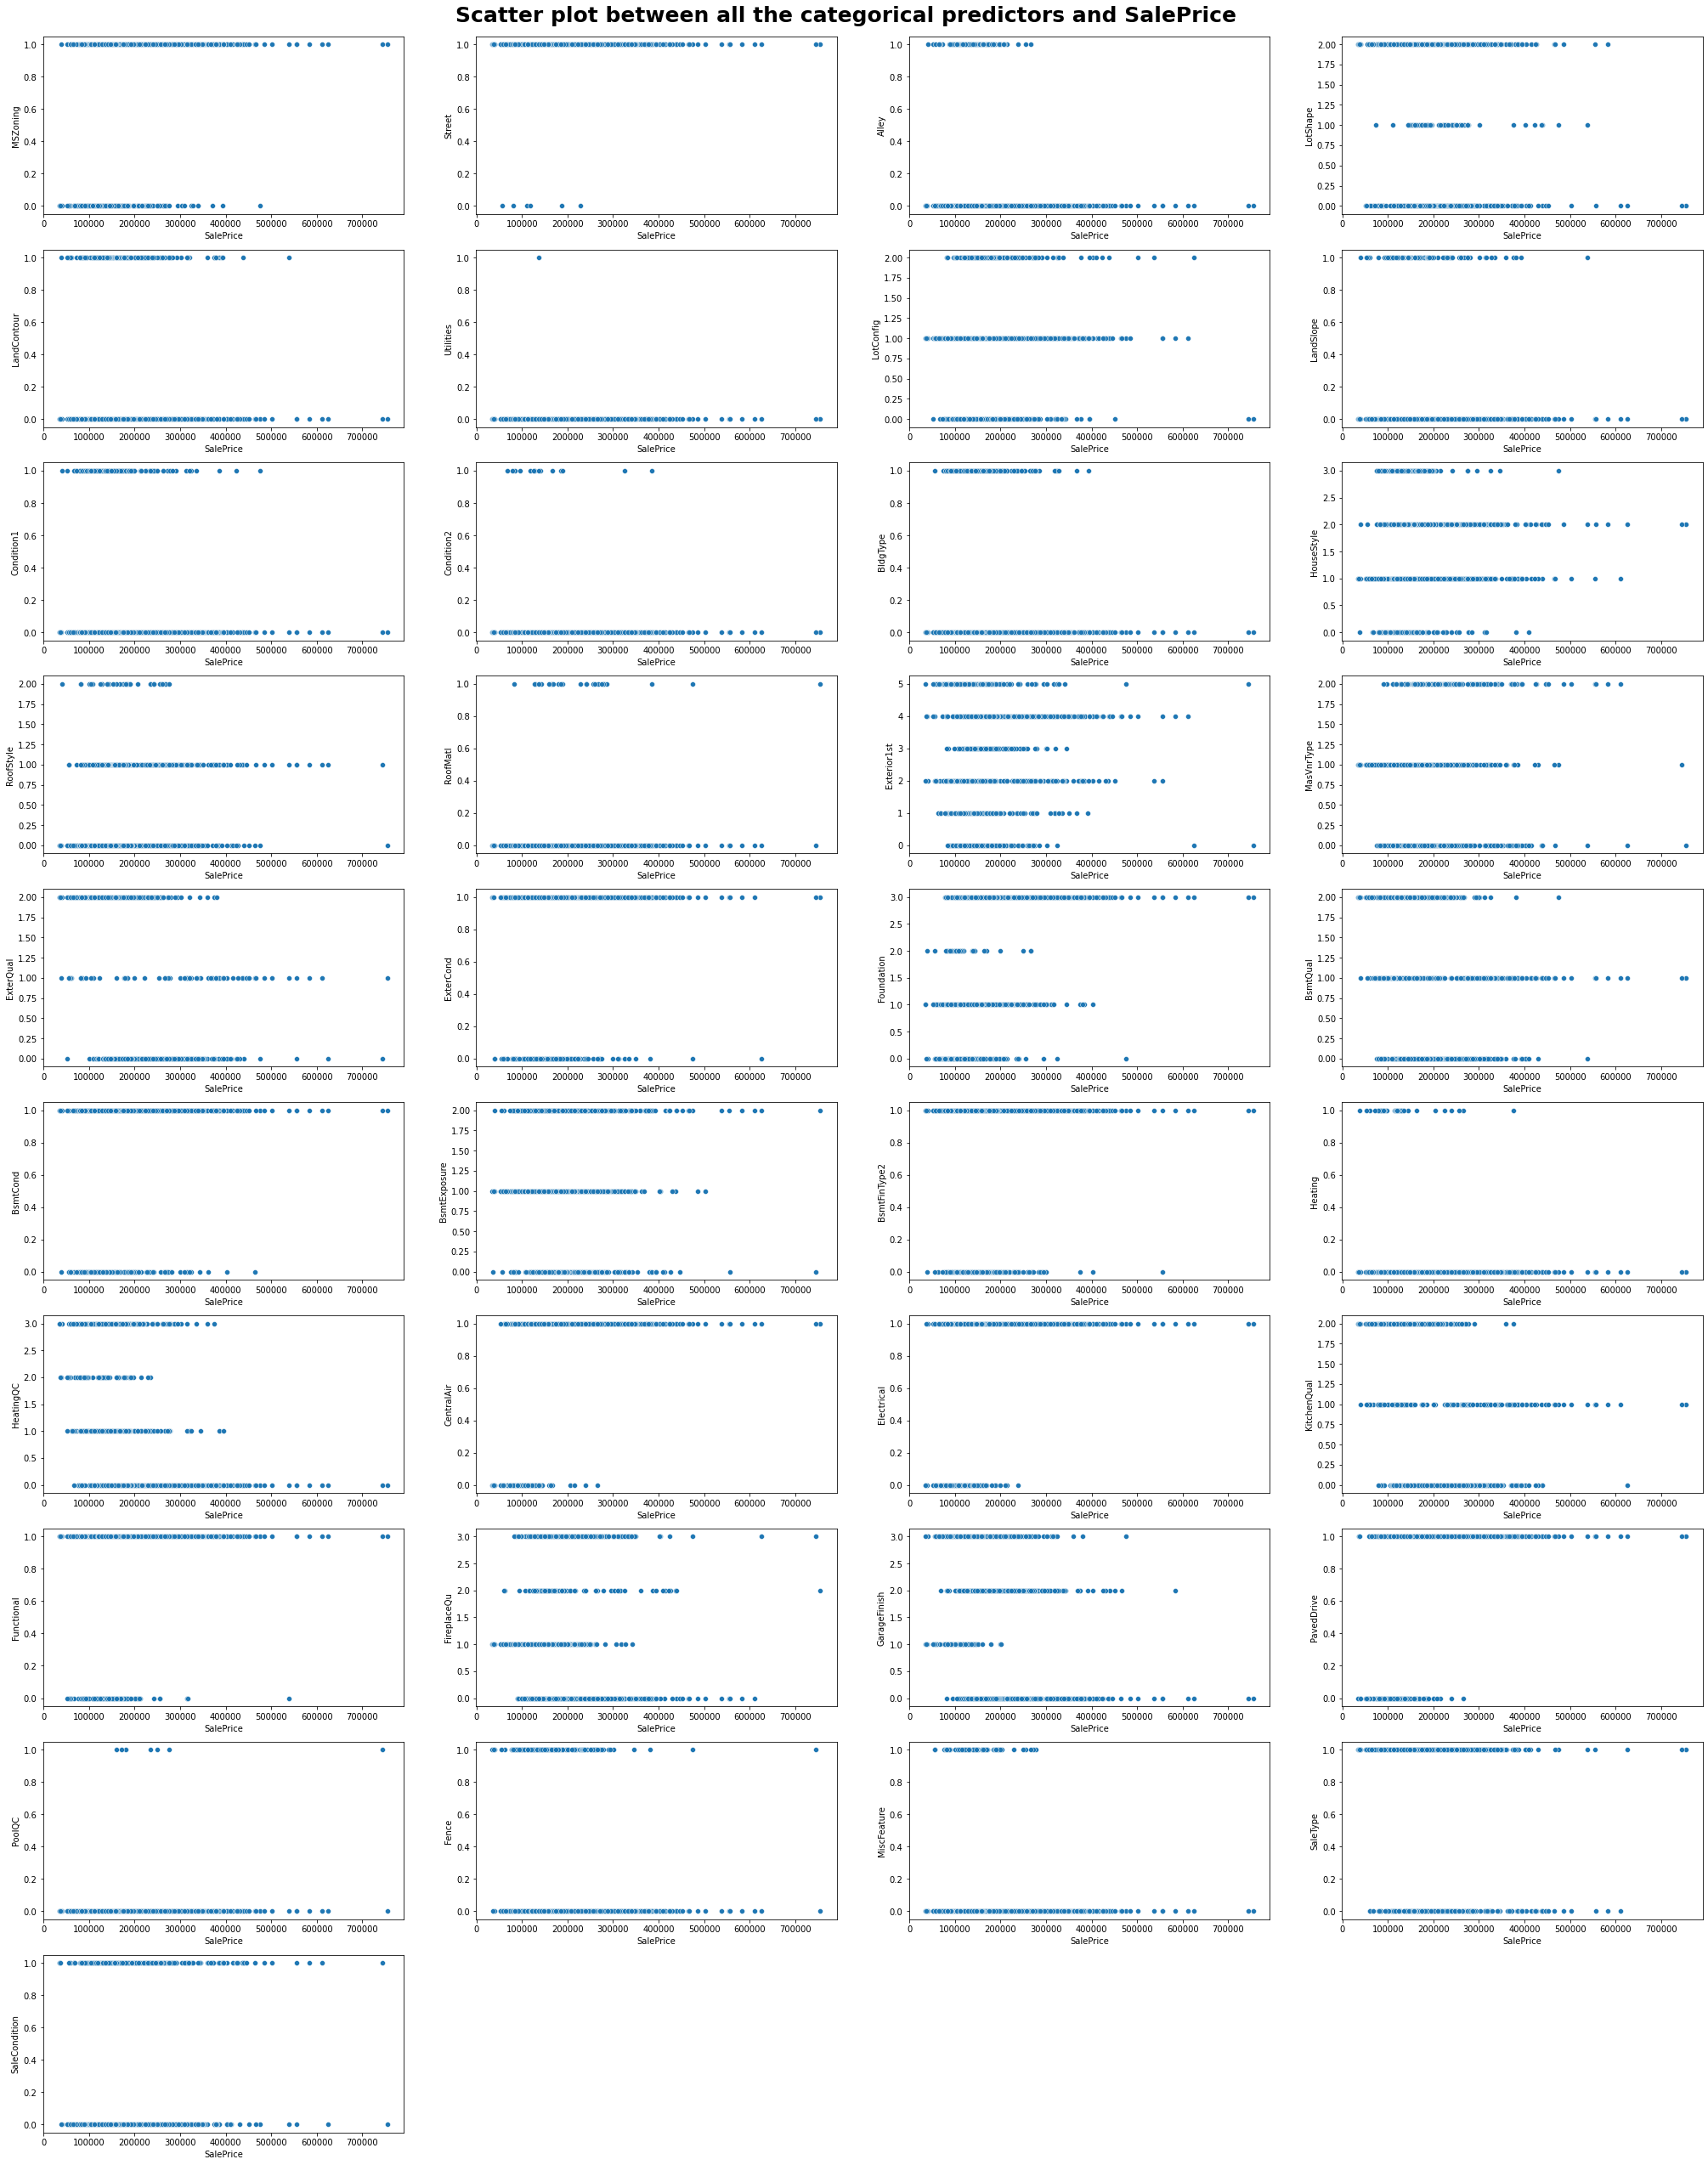

In [44]:
# Creating an empty list to store the correlation values between each predictor and target
corr_with_saleprice_cat_col = []

warnings.filterwarnings("ignore")
plt.subplots(figsize = (35, 50))
plt.suptitle("Scatter plot between all the categorical predictors and SalePrice",
             fontsize = 25, y = 0.89, fontweight = "bold")

count = 1
for k in df_train_cat_encoded.columns:
     plt.subplot(11, 4, count)
     sns.scatterplot(df_train['SalePrice'], df_train_cat_encoded[k])
     count = count + 1
     list_cat_temp = []
     corr = df_train_cat_encoded[k].corr(df_train["SalePrice"])
     list_cat_temp.append(k)
     list_cat_temp.append(corr)
     corr_with_saleprice_cat_col.append(list_cat_temp)

plt.tight_layout
plt.show()

In [46]:
df_scatter_cat = df_train_cat_encoded
df_corr_with_saleprice_cat = pd.DataFrame(data = corr_with_saleprice_cat_col, columns = ["Predictor","Correlation_Coefficient"])
df_corr_with_saleprice_cat

,Predictor,Correlation_Coefficient
0,MSZoning,0.245063
1,Street,0.041036
2,Alley,-0.123611
3,LotShape,-0.250414
4,LandContour,0.027545
5,Utilities,-0.014314
6,LotConfig,0.063080
7,LandSlope,0.051116
8,Condition1,-0.112968
9,Condition2,-0.030676


In [47]:
# Dropping the weakly correlated columns with Target Variable - Sales variable having less than 0.5 as correlation coefficients 
df_weak_corr_with_saleprice_cat = df_corr_with_saleprice_cat[abs(df_corr_with_saleprice_cat.Correlation_Coefficient ) < 0.2]
df_weak_corr_with_saleprice_cat_col = df_weak_corr_with_saleprice_cat["Predictor"].unique()

df_scatter_cat = df_scatter_cat.drop(df_weak_corr_with_saleprice_cat_col, axis = 1)
df_scatter_cat

,MSZoning,LotShape,ExterQual,Foundation,BsmtQual,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,PavedDrive,SaleType
0,1,2,0,3,0,0,1,1,0,2,1,1
1,1,2,2,1,0,0,1,1,2,2,1,1
2,1,0,0,3,0,0,1,1,0,2,1,1
3,1,0,2,0,2,1,1,1,0,3,1,1
4,1,0,0,3,0,0,1,1,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,2,2,3,0,0,1,1,2,2,1,1
1456,1,2,2,1,0,3,1,1,2,3,1,1
1457,1,2,1,2,2,0,1,1,0,2,1,1
1458,1,2,2,1,2,1,1,0,0,3,1,1


In [ ]:
corr_with_saleprice_cat_col
df_weak_corr_with_saleprice_cat_col

# Data Encoding - Performing Target Encoding to encode Categorical Columns in Dataset

In [21]:
# Target Encoding
df_train_cat_comb = pd.concat([df_train_cat, df_train['SalePrice']], axis = 1)

#Create target encoding object
encoder = ce.TargetEncoder(cols = df_train_cat_comb.loc[:, df_train_cat_comb.columns != "SalePrice"]) 

#Fit and Transform Train Data
data_encoded = encoder.fit_transform(df_train_cat_comb.loc[:, df_train_cat_comb.columns != "SalePrice"], 
                                     df_train_cat_comb["SalePrice"])
data_encoded # Processed categorical data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageFinish,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,191004.994787,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,176938.047529,179956.799566,184495.492063,181169.405536,...,212116.023891,183429.147059,141331.482609,202068.869668,186433.973881,180404.663455,187596.837998,182046.410384,173401.836622,175202.219533
1,191004.994787,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,177934.574468,179956.799566,142475.481481,181169.405536,...,139962.511565,183429.147059,205723.488818,202068.869668,186433.973881,180404.663455,187596.837998,182046.410384,173401.836622,175202.219533
2,191004.994787,181130.538514,183452.131483,206101.665289,180183.746758,180950.95682,176938.047529,179956.799566,184495.492063,181169.405536,...,212116.023891,183429.147059,205723.488818,202068.869668,186433.973881,180404.663455,187596.837998,182046.410384,173401.836622,175202.219533
3,191004.994787,181130.538514,183452.131483,206101.665289,180183.746758,180950.95682,181623.425856,179956.799566,184495.492063,181169.405536,...,212116.023891,183429.147059,226351.415789,142156.423140,186433.973881,180404.663455,187596.837998,182046.410384,173401.836622,146526.623762
4,191004.994787,181130.538514,183452.131483,206101.665289,180183.746758,180950.95682,177934.574468,179956.799566,184495.492063,181169.405536,...,212116.023891,183429.147059,205723.488818,202068.869668,186433.973881,180404.663455,187596.837998,182046.410384,173401.836622,175202.219533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,191004.994787,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,176938.047529,179956.799566,184495.492063,181169.405536,...,139962.511565,183429.147059,205723.488818,202068.869668,186433.973881,180404.663455,187596.837998,182046.410384,173401.836622,175202.219533
1456,191004.994787,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,176938.047529,179956.799566,184495.492063,181169.405536,...,139962.511565,146385.483871,205723.488818,142156.423140,186433.973881,180404.663455,148751.089172,182046.410384,173401.836622,175202.219533
1457,191004.994787,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,176938.047529,179956.799566,184495.492063,181169.405536,...,212116.023891,183429.147059,226351.415789,202068.869668,186433.973881,180404.663455,178927.457627,151187.612245,173401.836622,175202.219533
1458,191004.994787,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,176938.047529,179956.799566,184495.492063,181169.405536,...,212116.023891,183429.147059,141331.482609,142156.423140,186433.973881,180404.663455,187596.837998,182046.410384,173401.836622,175202.219533


In [22]:
# Combining the processed numerical and categorical columns into single dataframe
df_processed_data = pd.concat([df_train_num_dr, data_encoded], axis = 1)

# Extracting the target variable (SalePrice) and putting it as the last column
target_column = df_processed_data.pop('SalePrice')
df_processed_data.insert(loc = len(df_processed_data.columns),
                         column = 'SalePrice', value = target_column)

# View the final cleaned dataframe
df_processed_data

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,...,Functional,FireplaceQu,GarageFinish,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,60,8450,7,5,196.0,706,0,150,856,854,...,183429.147059,141331.482609,202068.869668,186433.973881,180404.663455,187596.837998,182046.410384,173401.836622,175202.219533,208500
1,20,9600,6,8,0.0,978,0,284,1262,0,...,183429.147059,205723.488818,202068.869668,186433.973881,180404.663455,187596.837998,182046.410384,173401.836622,175202.219533,181500
2,60,11250,7,5,162.0,486,0,434,920,866,...,183429.147059,205723.488818,202068.869668,186433.973881,180404.663455,187596.837998,182046.410384,173401.836622,175202.219533,223500
3,70,9550,7,5,0.0,216,0,540,961,756,...,183429.147059,226351.415789,142156.423140,186433.973881,180404.663455,187596.837998,182046.410384,173401.836622,146526.623762,140000
4,60,14260,8,5,350.0,655,0,490,1145,1053,...,183429.147059,205723.488818,202068.869668,186433.973881,180404.663455,187596.837998,182046.410384,173401.836622,175202.219533,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,0.0,0,0,953,953,694,...,183429.147059,205723.488818,202068.869668,186433.973881,180404.663455,187596.837998,182046.410384,173401.836622,175202.219533,175000
1456,20,13175,6,6,119.0,790,163,589,2073,0,...,146385.483871,205723.488818,142156.423140,186433.973881,180404.663455,148751.089172,182046.410384,173401.836622,175202.219533,210000
1457,70,9042,7,9,0.0,275,0,877,1188,1152,...,183429.147059,226351.415789,202068.869668,186433.973881,180404.663455,178927.457627,151187.612245,173401.836622,175202.219533,266500
1458,20,9717,5,6,0.0,49,1029,0,1078,0,...,183429.147059,141331.482609,142156.423140,186433.973881,180404.663455,187596.837998,182046.410384,173401.836622,175202.219533,142125
